In [1]:
import numpy as np
from numpy import pi

c = (2*pi)**(3/2)
H = lambda x: c*np.sqrt(np.abs(np.sum(x,axis=1)))
N = 10**6 # sample size
z = 1.96  # confidence interval 95%
x = np.random.randn(N,3)
y = H(x)
mY = np.mean(y)
sY = np.std(y)
RE = sY/mY/np.sqrt(N)
print('Estimate = {:3.3f}, CI = ({:3.3f},{:3.3f})'.format(
        mY, mY*(1-z*RE), mY*(1+z*RE)))   

Estimate = 17.043, CI = (17.028,17.057)


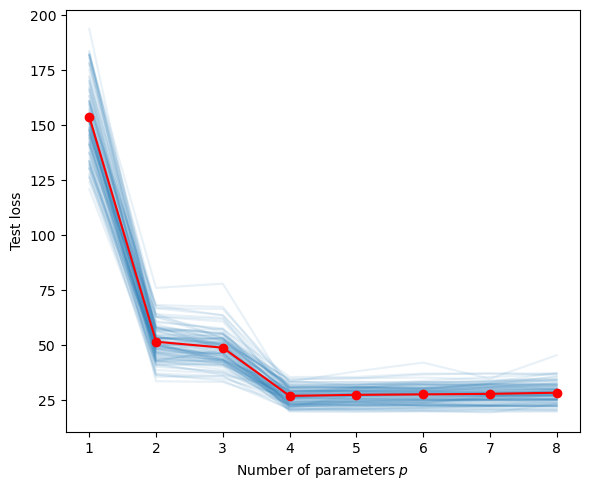

In [2]:
""" CMCtestloss.py """
import numpy as np, matplotlib.pyplot as plt 
from numpy.random import rand, randn
from numpy.linalg import solve

def generate_data(beta, sig, n):
    u = rand(n, 1)
    y = (u ** np.arange(0, 4)) @ beta + sig * randn(n, 1)
    return u, y

beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
betahat = {}
plt.figure(figsize=[6,5])
totMSE = np.zeros(8)
max_p = 8
p_range = np.arange(1, max_p + 1, 1)

for N in range(0,100):
    u, y = generate_data(beta, sig, n)  #training data
    X = np.ones((n, 1))
    for p in p_range:
       if p > 1:
         X = np.hstack((X, u**(p-1)))
       betahat[p] = solve(X.T @ X, X.T @ y)
    
    u_test, y_test = generate_data(beta, sig, n)  #test data
    MSE = []
    X_test = np.ones((n, 1))
    for p in p_range:
       if p > 1:
           X_test = np.hstack((X_test, u_test**(p-1)))
       y_hat = X_test @ betahat[p] # predictions
       MSE.append(np.sum((y_test - y_hat)**2/n))
     
    totMSE = totMSE + np.array(MSE)
    plt.plot(p_range, MSE,'C0',alpha=0.1)

plt.plot(p_range,totMSE/N,'r-o')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('../figures/MSErepeatpy.pdf',format='pdf')
plt.show()